In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:, :, i] = color_mask[i]
        ax.imshow(np.dstack((img, m * 0.35)))

In [3]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_highlevel_checkpoint = 'sam_vit_h_4b8939.pth'
highlevel_modeltype = 'vit_h'
sam_bottomlevel_checkpoint = 'sam_vit_b_01ec64.pth'
bottomlevel_modeltype = 'vit_b'

sam = sam_model_registry[highlevel_modeltype](sam_highlevel_checkpoint)
sam.to()

mask_generator = SamAutomaticMaskGenerator(sam)

In [4]:
image = cv2.imread('dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

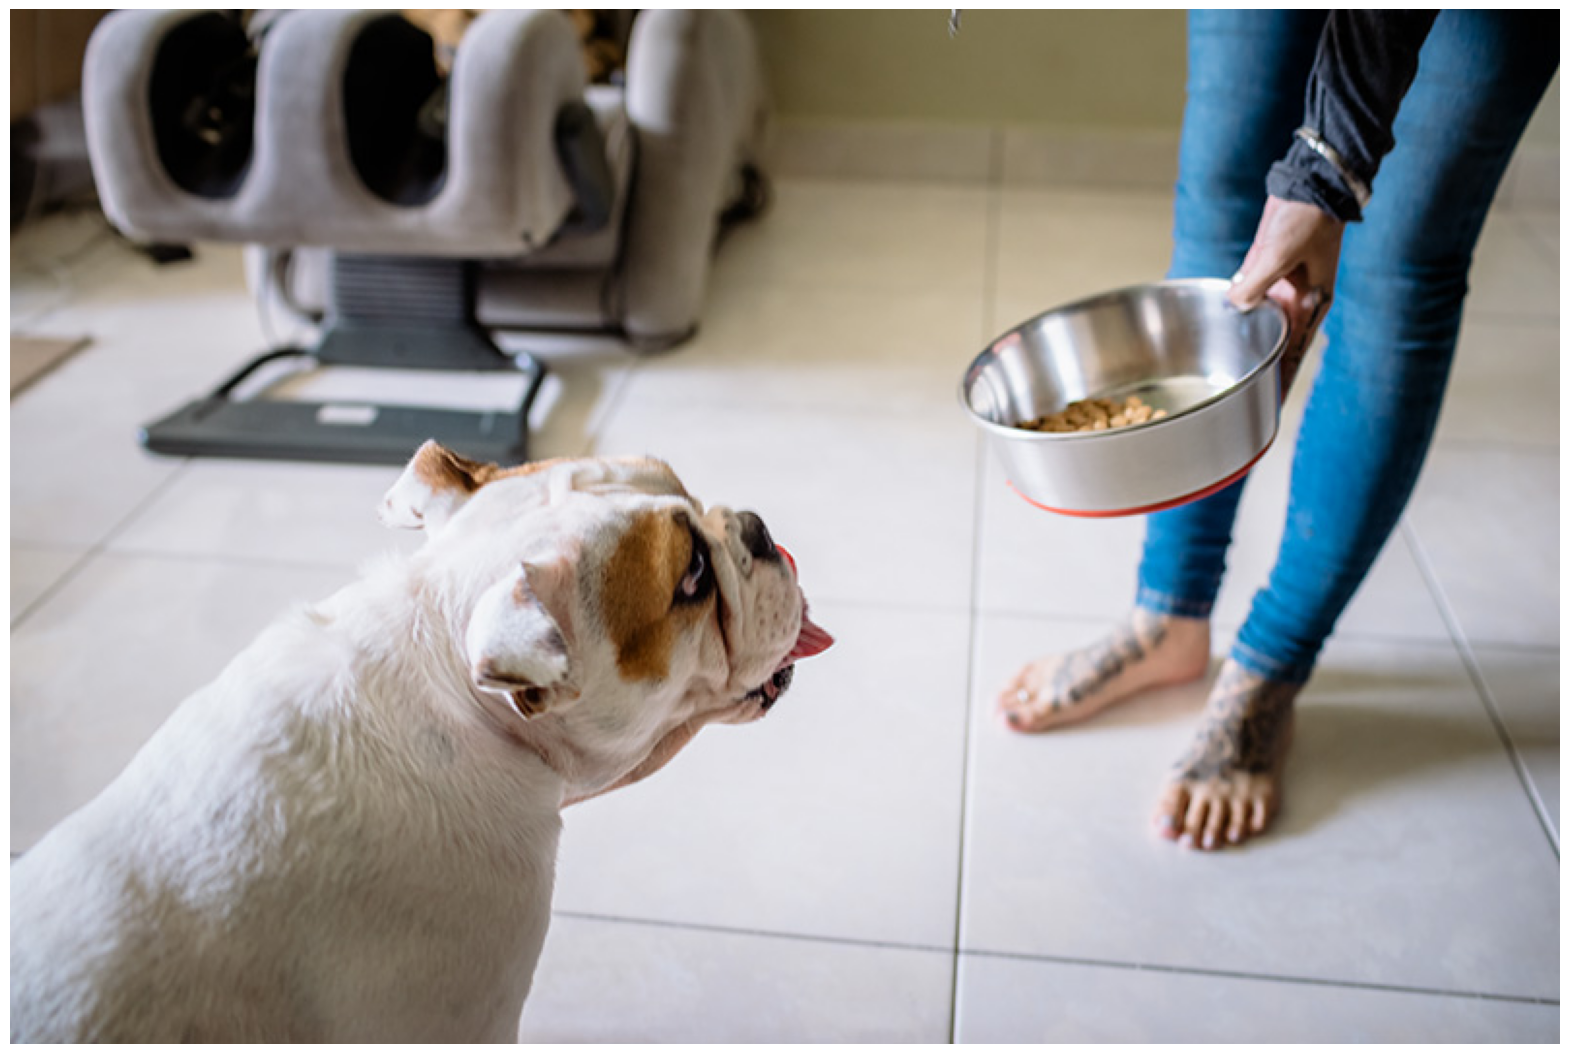

In [5]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
masks = mask_generator.generate(image)

Auto generator tries to segment anything in the image. Thus, more computation resources will be used. In addition, we use CPU to complete this task and we use high level model. So it takes over 50 seconds to finish the segment task.

In [7]:
len(masks)

66

In [10]:
masks[0].keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

* segmentation: the mask;
* area: the area of the mask in pixels;
* bbox: the bounding box of the mask in XYWH format;
* predictid_iou: the model's own prediction for the quality of the mask;
* point_coords: the sampled input point that generated this mask;
* stability_score: an additional measure of mask quality;
* crop_box: the corp of the image used to generate this mask in XYWH format;

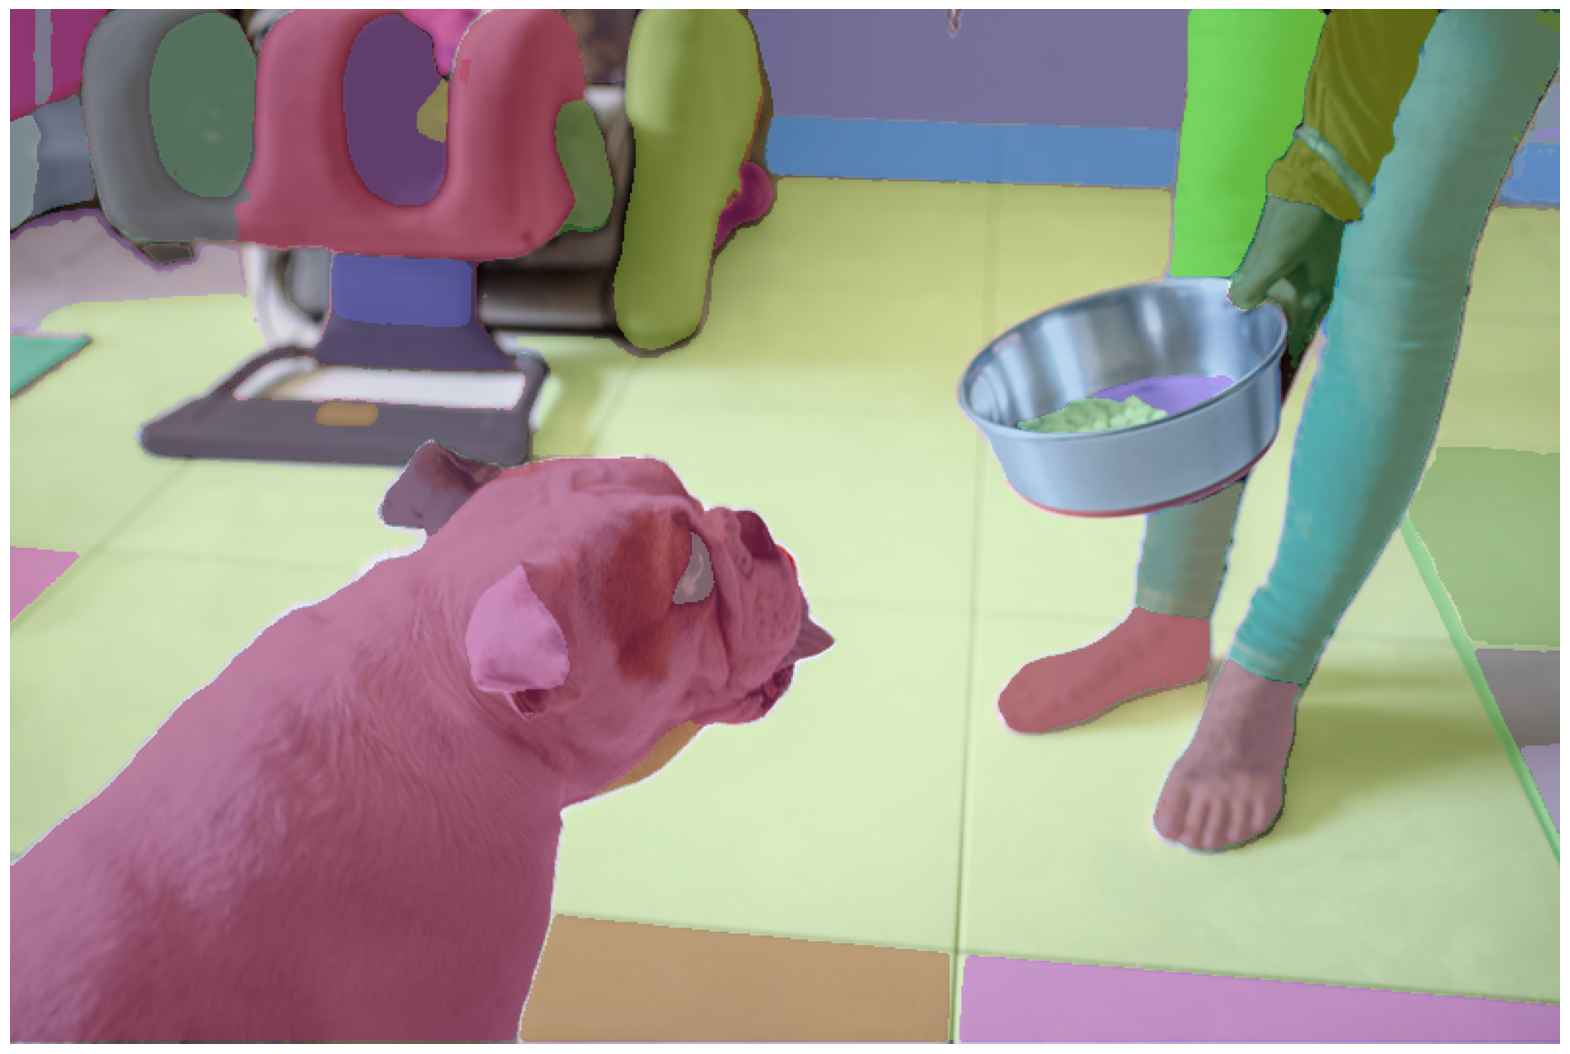

In [11]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [12]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [13]:
masks2 = mask_generator_2.generate(image)

It cost a much more time than mask without any option. Two minutes and twenty three point eight seconds!

In [14]:
len(masks2)

90

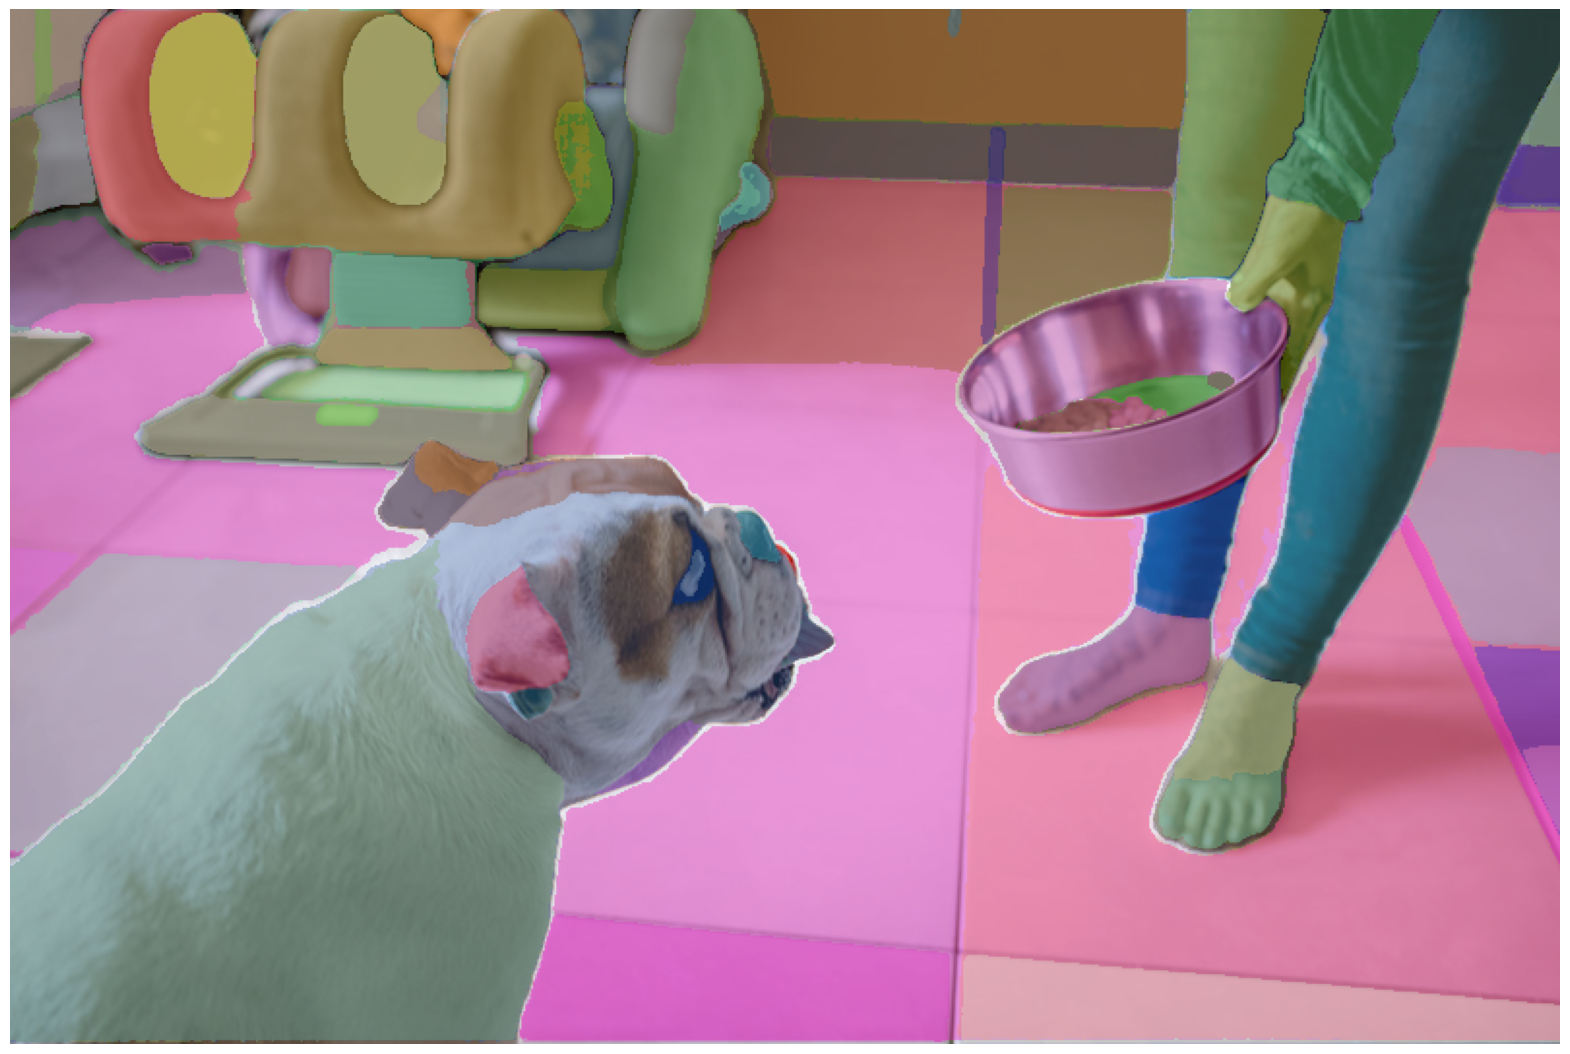

In [15]:
plt.figure(figsize=(20, 20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()